In [31]:
!pip install rsfs
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
import rsfs
from sklearn.model_selection import train_test_split
%matplotlib inline
import tensorflow as tf
import seaborn as sns
from time import time

In [32]:
t1 = time()
Data = np.loadtxt(open(str('filtered_oversampled'), "rb"), delimiter=",", skiprows=1)
labels = Data[:, -1]
Data = Data[:, :-1]
train, test, train_labels, test_labels = train_test_split(
  Data, labels, test_size=0.33, random_state=42, stratify=labels)
data_train = train
data_test = test
label_train = train_labels
label_test = test_labels
Parameters = {
  'RSFS': {
      'Classifier': 'KNN',
      'Classifier Properties': {
          'n_neighbors': 3,
          'weights': 'distance'
      },
      'Dummy feats': len(labels),
      'delta': 0.05,
      'maxiters': 300000,
      'fn': 'sqrt',
      'cutoff': 0.90,
      'Threshold': 1000,
  },
  'Verbose': 1
}
Ex_Features = rsfs.RSFS(train,test,train_labels,test_labels,Parameters)['F_RSFS'][0]
print(Ex_Features)
print(time() - t1)

/home/surya/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1919: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


RSFS:  114.0 features chosen so far (iteration:  1000 / 300000 ). Delta:  0.24297942122963692
RSFS:  158.0 features chosen so far (iteration:  2000 / 300000 ). Delta:  0.14172992749002136
RSFS:  167.0 features chosen so far (iteration:  3000 / 300000 ). Delta:  0.08350288989850535
RSFS:  172.0 features chosen so far (iteration:  4000 / 300000 ). Delta:  0.029355523587758916
[   0   50   60   72  117  126  199  268  299  310  319  321  325  332
  336  369  381  395  396  411  481  494  512  580  582  587  592  621
  675  705  737  745  771  787  791  792  873  875  887  890  946  963
  971  998 1001 1035 1038 1043 1066 1084 1109 1137 1139 1157 1173 1244
 1345 1440 1456 1461 1473 1486 1489 1513 1525 1526 1530 1592 1602 1622
 1628 1655 1663 1664 1704 1740 1763 1845 1875 1925 1943 1945 1992 2041
 2074 2134 2135 2136 2140 2173 2180 2229 2231 2241 2263 2309 2402 2416
 2419 2420 2474 2498 2510 2516 2530 2557 2581 2591 2599 2602 2621 2655
 2701 2728 2735 2740 2748 2754 2767 2771 2802 2803 2879

In [3]:
df=pd.read_csv("filtered_oversampled")
df = df.drop('Unnamed: 0', axis = 1)
Xrsfs = df[df.columns[list(Ex_Features)]]
Xrsfs = Xrsfs.iloc[:,:-1]


In [4]:
y = df['label'].values


/home/surya/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

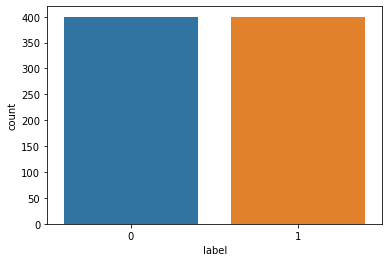

In [5]:
sns.countplot(df['label'], order = df['label'].value_counts().index)

In [12]:
X = df[df.columns[:-1]].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


X_rsfstrain, X_rsfstest, y_rsfstrain, y_rsfstest = train_test_split( Xrsfs, y, test_size=0.33, random_state=4)
print ('Train set:', X_rsfstrain.shape,  y_rsfstrain.shape)
print ('Test set:', X_rsfstest.shape,  y_rsfstest.shape)


Train set: (536, 4097) (536,)
Test set: (264, 4097) (264,)
Train set: (536, 232) (536,)
Test set: (264, 232) (264,)


In [13]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
df.columns[:6000]

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '4088', '4089', '4090', '4091', '4092', '4093', '4094', '4095', '4096',
       'label'],
      dtype='object', length=4098)

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
grade = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [18]:

clf = AdaBoostClassifier(grade,n_estimators=100, random_state=0)
# Using Decision tree as a base estimator
t0=time()
clf.fit(X_train,y_train)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
a=clf.predict(X_test)
print("predict time:", round(time()-t1, 3))
print(clf.score(X_test, y_test))
print(classification_report(y_test, a))

training time: 114.64
predict time: 0.211
0.9924242424242424
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.99      0.99      0.99       127

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264



In [17]:
clf = AdaBoostClassifier(grade,n_estimators=100, random_state=0)
t0=time()
clf.fit(X_rsfstrain,y_rsfstrain)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
a=clf.predict(X_rsfstest)
print("predict time:", round(time()-t1, 3))
print(clf.score(X_rsfstest, y_rsfstest))
print(classification_report(y_rsfstest, a))

training time: 6.685
predict time: 0.03
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       127

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



In [19]:
from sklearn.svm import LinearSVC
clf = SVC(kernel='rbf')
t0=time()
clf.fit(X_train, y_train)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
a=clf.predict(X_test)
print("predict time:", round(time()-t1, 3))

training time: 0.311
predict time: 0.266


In [20]:
from sklearn.svm import LinearSVC
clf = SVC(kernel='rbf')
t0=time()
clf.fit(X_rsfstrain, y_rsfstrain)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
a=clf.predict(X_rsfstest)
print("predict time:", round(time()-t1, 3))

training time: 0.024
predict time: 0.015


In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:

cl=GaussianNB()
t0=time()
cl.fit(X_train,y_train)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
a=cl.predict(X_test)
print("predict time:", round(time()-t1, 3))

training time: 0.035
predict time: 0.013


In [23]:

cl=GaussianNB()
t0=time()
cl.fit(X_rsfstrain,y_rsfstrain)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
a=cl.predict(X_rsfstest)
print("predict time:", round(time()-t1, 3))

training time: 0.015
predict time: 0.008


In [24]:
from sklearn.linear_model import LogisticRegression


In [26]:
clf=LogisticRegression(random_state=11)
t0=time()
clf.fit(X_train,y_train)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
b=clf.predict(X_test)
print("predict time:", round(time()-t1, 3))

training time: 0.622
predict time: 0.005


/home/surya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
clf=LogisticRegression(random_state=11)
t0=time()
clf.fit(X_rsfstrain,y_rsfstrain)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
b=clf.predict(X_rsfstest)
print("predict time:", round(time()-t1, 3))

training time: 0.129
predict time: 0.006


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')

In [29]:
t0=time()
rf.fit(X_train,y_train)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
b=rf.predict(X_test)
print("predict time:", round(time()-t1, 3))

training time: 1.152
predict time: 0.017


In [30]:
t0=time()
rf.fit(X_rsfstrain,y_rsfstrain)
print("training time:", round(time()-t0, 3))# the time would be round to 3 decimal in seconds
t1=time()
b=rf.predict(X_rsfstest)
print("predict time:", round(time()-t1, 3))

training time: 0.403
predict time: 0.016


In [ ]:
tc = pd.read_csv()